# Exploratory Data Analysys (EDA)
## Costumer loans dataset


 **Cel Biznesowy**: Celem projektu będzie jest zbudowanie modelu predykcyjnego który na podstwie dostępnych cech będzie w stanie określić czy dana osoba spłaci kredyt(1) czy też nie (0)

In [5]:
import pandas as pd
import numpy as np 
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression


In [6]:
df = pd.read_csv("orig_train.csv")
df.head(20)

,PRODUCT,AGE,AREA,RESIDENTIAL_PLACE,EDUCATION,MARITAL_STATUS,HOUSEHOLD_MEMBERS,NO_OF_DEPENDENTS,INCOME,WORK_SENIORITY,...,LENGTH_RELATIONSHIP_WITH_CLIENT,DEBIT_CARD,CURRENT_ACCOUNT,SAVING_ACCOUNT,SALARY_ACCOUNT,FOREIGN_ACCOUNT,FINALIZED_LOAN,DEPOSIT,PENSION_FUNDS,DEFAULT_FLAG
0,C,65,County capital,Owner without mortgage,University,married,2,0,1245.0000,5,...,1,0,0,0,0,0,0,0,0,0
1,C,64,County capital,Owner without mortgage,University,married,2,0,1380.0000,5,...,8,0,0,0,0,0,0,0,0,0
2,F,30,Urban area,Living with family,University,married,2,0,1131.0000,2,...,1,1,1,0,0,0,0,0,0,0
3,C,39,County capital,Owner without mortgage,Post-graduate,divorced,1,0,1730.0000,9,...,2,0,0,0,0,0,0,0,0,0
4,B,38,County capital,Owner without mortgage,Highschool,single,1,0,1189.0000,5,...,1,1,1,0,0,0,0,0,0,0
5,C,40,Rural area,Owner without mortgage,Missing,single,1,0,740.0000,7,...,1,0,0,0,0,0,0,0,0,0
6,C,45,County capital,Owner without mortgage,Missing,married,3,1,1010.0000,7,...,12,0,0,0,0,0,0,0,0,0
7,B,27,Rural area,Living with family,Post secondary school,single,1,0,630.0000,4,...,2,0,0,0,0,0,0,0,0,1
8,C,45,Rural area,Owner without mortgage,Other,married,2,0,816.8000,20,...,1,1,1,0,0,0,0,0,0,0
9,F,34,County capital,Living with family,Post-graduate,married,3,1,2373.0000,4,...,13,0,0,0,0,0,0,0,0,0


In [7]:
len(df)

15097

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15097 entries, 0 to 15096
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   PRODUCT                          15097 non-null  object 
 1   AGE                              15097 non-null  int64  
 2   AREA                             15097 non-null  object 
 3   RESIDENTIAL_PLACE                15097 non-null  object 
 4   EDUCATION                        15097 non-null  object 
 5   MARITAL_STATUS                   15097 non-null  object 
 6   HOUSEHOLD_MEMBERS                15097 non-null  int64  
 7   NO_OF_DEPENDENTS                 15097 non-null  int64  
 8   INCOME                           15097 non-null  float64
 9   WORK_SENIORITY                   15097 non-null  int64  
 10  BUSINESS AGE                     15097 non-null  int64  
 11  ECONOMIC_SECTOR                  15097 non-null  object 
 12  EMPLOYEE_NO       

In [9]:
df.describe()

,AGE,HOUSEHOLD_MEMBERS,NO_OF_DEPENDENTS,INCOME,WORK_SENIORITY,BUSINESS AGE,LENGTH_RELATIONSHIP_WITH_CLIENT,DEBIT_CARD,CURRENT_ACCOUNT,SAVING_ACCOUNT,SALARY_ACCOUNT,FOREIGN_ACCOUNT,FINALIZED_LOAN,DEPOSIT,PENSION_FUNDS,DEFAULT_FLAG
count,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.0,15097.000000
mean,43.584553,1.717229,0.199510,1958.071916,6.647347,17.938001,4.996556,0.384116,0.485461,0.000397,0.123203,0.000132,0.164205,0.003709,0.0,0.057230
std,13.460964,0.759843,0.493135,1772.153274,5.647763,12.477914,4.900952,0.486402,0.499805,0.019932,0.328681,0.011509,0.370474,0.060793,0.0,0.232289
min,19.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,32.000000,1.000000,0.000000,1007.420000,3.000000,12.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,42.000000,2.000000,0.000000,1426.495000,5.000000,16.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
75%,56.000000,2.000000,0.000000,2290.000000,8.000000,21.000000,10.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
max,74.000000,5.000000,4.000000,40621.600000,46.000000,116.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000


In [10]:
df.head()

,PRODUCT,AGE,AREA,RESIDENTIAL_PLACE,EDUCATION,MARITAL_STATUS,HOUSEHOLD_MEMBERS,NO_OF_DEPENDENTS,INCOME,WORK_SENIORITY,...,LENGTH_RELATIONSHIP_WITH_CLIENT,DEBIT_CARD,CURRENT_ACCOUNT,SAVING_ACCOUNT,SALARY_ACCOUNT,FOREIGN_ACCOUNT,FINALIZED_LOAN,DEPOSIT,PENSION_FUNDS,DEFAULT_FLAG
0,C,65,County capital,Owner without mortgage,University,married,2,0,1245.0,5,...,1,0,0,0,0,0,0,0,0,0
1,C,64,County capital,Owner without mortgage,University,married,2,0,1380.0,5,...,8,0,0,0,0,0,0,0,0,0
2,F,30,Urban area,Living with family,University,married,2,0,1131.0,2,...,1,1,1,0,0,0,0,0,0,0
3,C,39,County capital,Owner without mortgage,Post-graduate,divorced,1,0,1730.0,9,...,2,0,0,0,0,0,0,0,0,0
4,B,38,County capital,Owner without mortgage,Highschool,single,1,0,1189.0,5,...,1,1,1,0,0,0,0,0,0,0


## Dataset Description
#### Variables in order:
**PRODUCT** - Type of financial product the client has  
**AGE** - age of client  
**AREA** - The geographical area where the client resides  
**RESIDENTAL_PLACE** -  Indicates whether the client owns their living place (with further distinction on having a mortgage or not), lives with family, or is renting  
**EDUCATION** - The highest level of education attained by the client  
**MARTIAL_STATUS** - Describes the client's marital status, including options such as single, married, divorced, or widowed  
**HOUSEHOLD_MEMBERS** - The number of people living in the client's household  
**NO_OF_DEPENDENTS** - The number of individuals financially dependent on the client  
**INCOME** - The client's monthly income  
**WORK_SENIORITY** - The total number of years the client has been working  
**LENGTH_RELATIONSHIP_WITH_CLIENT**	- The duration (in years) of the client's relationship with the bank  
**DEBIT_CARD**- wheter clinet owns a debit card or not  
**CURRENT_ACCOUNT** -  wheter client owns a current account  
**SAVING_ACCOUNT** - wheter client owns a saving account  
**SALARY_ACCOUNT** - Indicates whether the client has a salary account with the bank, designed for receiving payroll  
**FOREIGN_ACCOUNT** -  Whether the client holds any bank accounts in foreign countries  
**FINALIZED_LOAN** - The number of loans the client has fully repaid  
**DEPOSIT** -   Indicates whether the client has made any fixed or term deposits with the bank  
**PENSION_FUNDS** - Whether the client has invested in any pension funds through the bank  
**DEFAULT_FLAG** -A binary indicator (e.g., Yes/No, 1/0) showing whether the client has defaulted on any financial obligation 



## Rozkłady zmiennych numerycznych

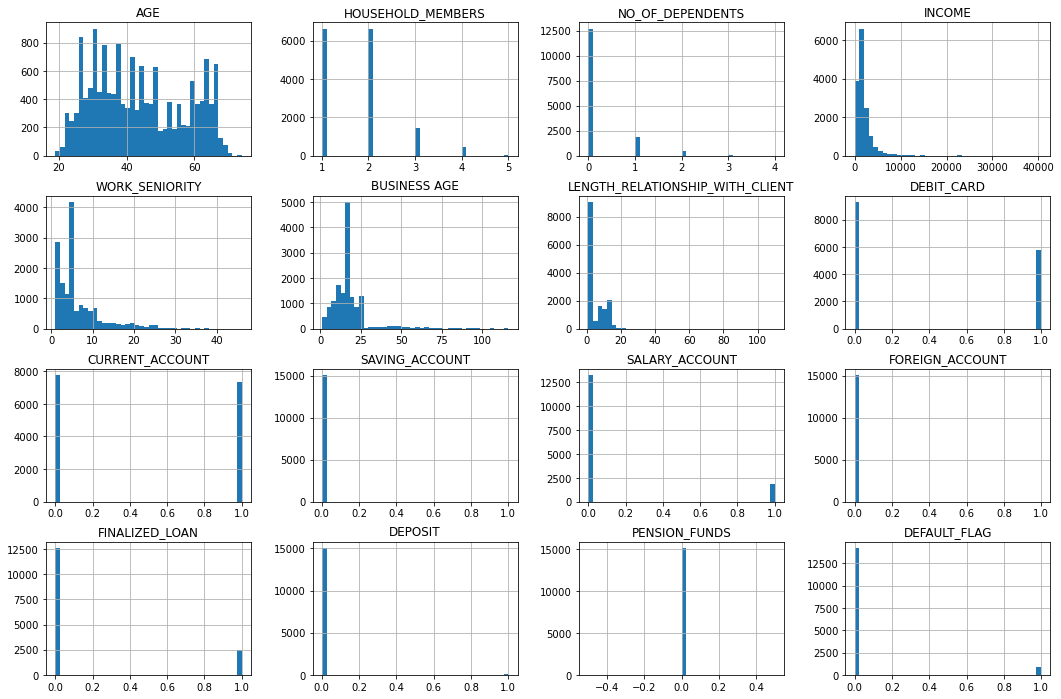

In [11]:
df.hist(bins = 40, figsize=(18, 12))
plt.show()

## Rozkłady zmiennych kategorycznych

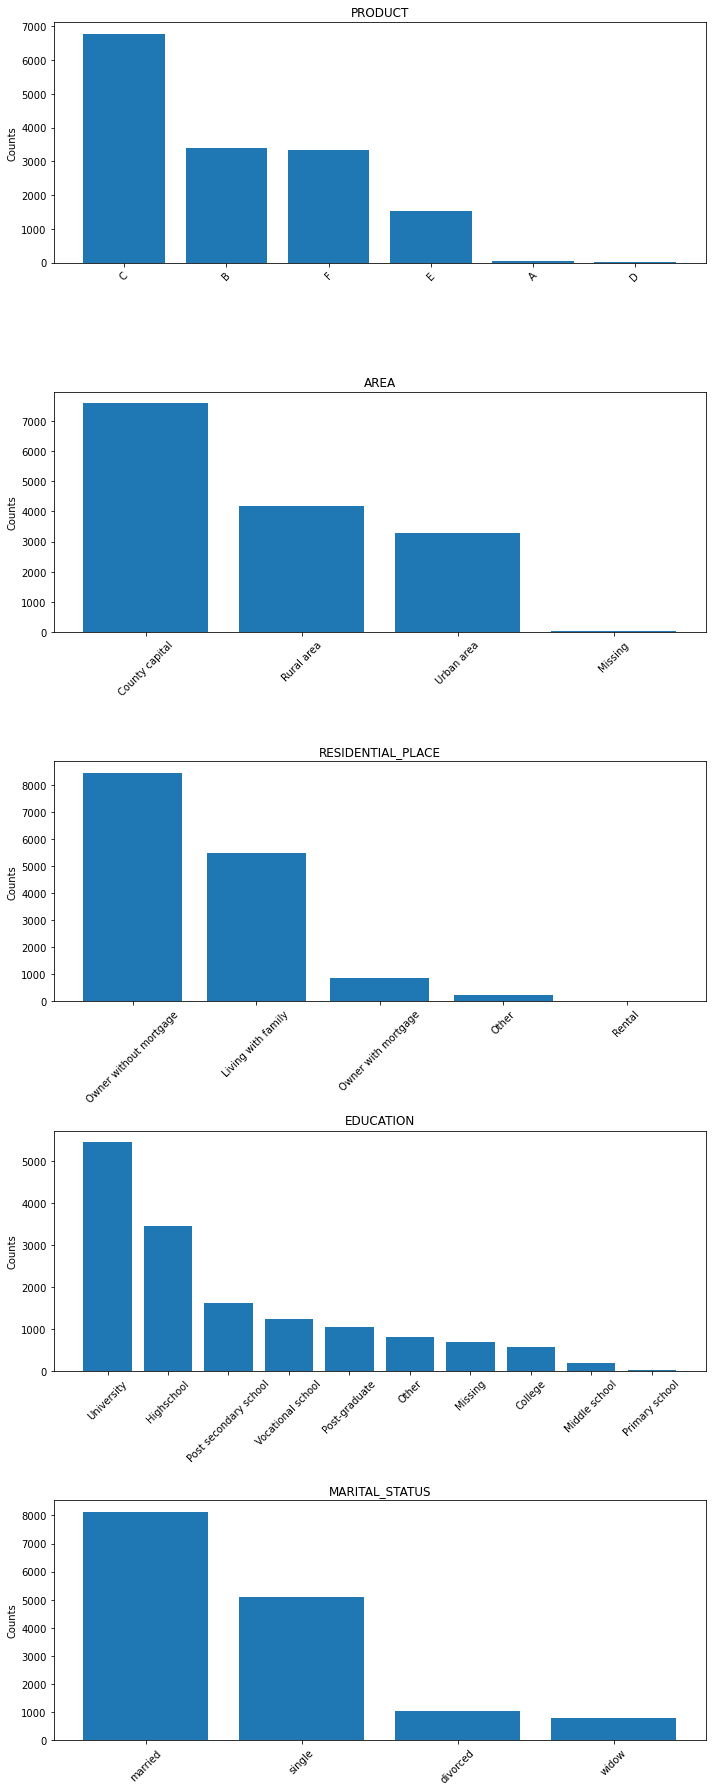

In [12]:
df_strings = df[["PRODUCT", "AREA", "RESIDENTIAL_PLACE", "EDUCATION", "MARITAL_STATUS"]]
fig, axs = plt.subplots(nrows= 5, ncols=1, figsize=(10, 5 * 5))
for ax, column in zip(axs, ["PRODUCT", "AREA", "RESIDENTIAL_PLACE", "EDUCATION", "MARITAL_STATUS"]):
    value_counts = df[column].value_counts()
    ax.bar(value_counts.index.astype(str), value_counts.values)
    ax.set_title(column)
    ax.set_ylabel('Counts')
    ax.tick_params(axis='x', rotation=45)  

plt.tight_layout()  
plt.show()                         

In [13]:
elems = ["PRODUCT", "AREA", "RESIDENTIAL_PLACE", "EDUCATION", "MARITAL_STATUS"]
for elem in elems:
    print(df[elem].unique())


['C' 'F' 'B' 'E' 'D' 'A']
['County capital' 'Urban area' 'Rural area' 'Missing']
['Owner without mortgage' 'Living with family' 'Owner with mortgage'
 'Rental' 'Other']
['University' 'Post-graduate' 'Highschool' 'Missing'
 'Post secondary school' 'Other' 'College' 'Vocational school'
 'Middle school' 'Primary school']
['married' 'divorced' 'single' 'widow']


## zamiana zmiennych kategorycznych na numeryczne

In [14]:
df['MARITAL_STATUS'] = df['MARITAL_STATUS'].replace({'single': 1, 'married': 2, 'divorced': 3, 'widow': 4})
df['PRODUCT'] = df['PRODUCT'].replace({'A': 1, 'B': 2, "C": 3, "D": 4, "E": 5, "F": 6})
df['AREA'] = df['AREA'].replace({'County capital' : 3, 'Urban area' : 2, 'Rural area' : 1, 'Missing': 0})
df["RESIDENTIAL_PLACE"] = df['RESIDENTIAL_PLACE'].replace({'Owner without mortgage' : 4,'Living with family' : 3,'Owner with mortgage' : 2,
 'Rental' : 1, 'Other': 0})
df["EDUCATION"] = df['EDUCATION'].replace({'University' : 9, 'Post-graduate' : 8, 'Highschool' : 7,'Missing' : 6,
 'Post secondary school' : 5,'College' : 4,'Vocational school' : 3,'Middle school' : 2, 'Primary school' : 1, 'Other' : 0})


df.head(20)

,PRODUCT,AGE,AREA,RESIDENTIAL_PLACE,EDUCATION,MARITAL_STATUS,HOUSEHOLD_MEMBERS,NO_OF_DEPENDENTS,INCOME,WORK_SENIORITY,...,LENGTH_RELATIONSHIP_WITH_CLIENT,DEBIT_CARD,CURRENT_ACCOUNT,SAVING_ACCOUNT,SALARY_ACCOUNT,FOREIGN_ACCOUNT,FINALIZED_LOAN,DEPOSIT,PENSION_FUNDS,DEFAULT_FLAG
0,3,65,3,4,9,2,2,0,1245.0000,5,...,1,0,0,0,0,0,0,0,0,0
1,3,64,3,4,9,2,2,0,1380.0000,5,...,8,0,0,0,0,0,0,0,0,0
2,6,30,2,3,9,2,2,0,1131.0000,2,...,1,1,1,0,0,0,0,0,0,0
3,3,39,3,4,8,3,1,0,1730.0000,9,...,2,0,0,0,0,0,0,0,0,0
4,2,38,3,4,7,1,1,0,1189.0000,5,...,1,1,1,0,0,0,0,0,0,0
5,3,40,1,4,6,1,1,0,740.0000,7,...,1,0,0,0,0,0,0,0,0,0
6,3,45,3,4,6,2,3,1,1010.0000,7,...,12,0,0,0,0,0,0,0,0,0
7,2,27,1,3,5,1,1,0,630.0000,4,...,2,0,0,0,0,0,0,0,0,1
8,3,45,1,4,0,2,2,0,816.8000,20,...,1,1,1,0,0,0,0,0,0,0
9,6,34,3,3,8,2,3,1,2373.0000,4,...,13,0,0,0,0,0,0,0,0,0


## Macierz Korelacji zmiennych

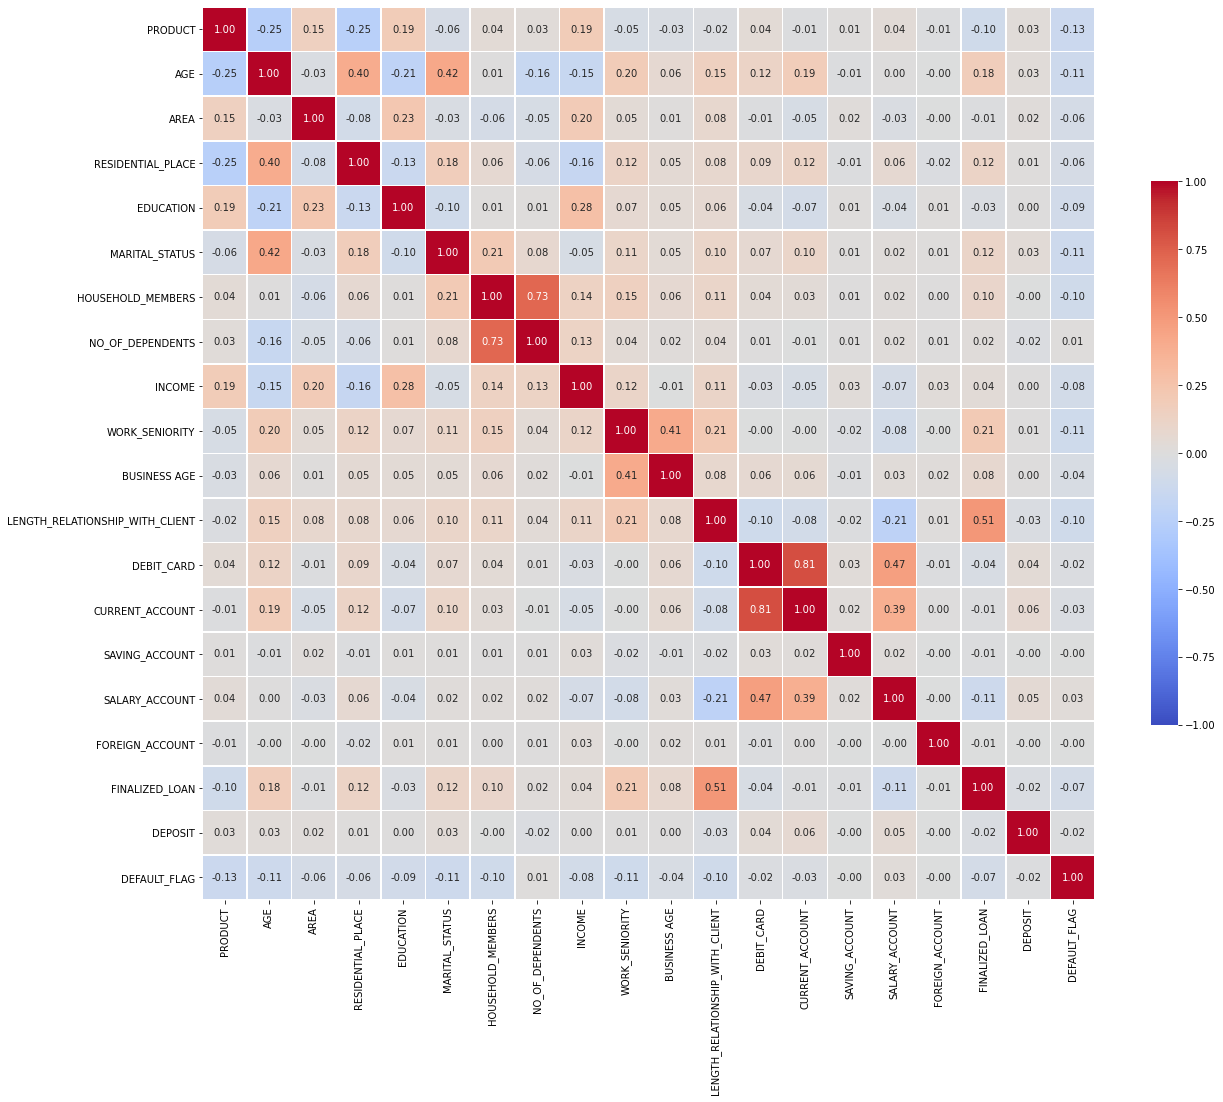

In [15]:
df = df.drop(columns = "PENSION_FUNDS")
correlation_matrix = df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, vmin=-1, vmax=1)

plt.show()

# Feature Engineering (FE)

Wybór cech: Wybierzemy cechy, które mogą mieć istotny wpływ na wyniki pożyczek. Na podstawie opisu danych wybierzemy cechy finansowe, historię kredytową oraz inne cechy, które mogą być istotne.

Przekształcenie zmiennych kategorycznych: Zakodujemy zmienne kategoryczne za pomocą kodowania gorących jedynek (One-Hot Encoding), aby mogły być wykorzystane przez modele uczenia maszynowego.

Normalizacja zmiennych numerycznych: Normalizujemy zmienne numeryczne, aby mieć podobny zakres wartości.

Usunięcie niepotrzebnych kolumn: Kolumna 'PENSION_FUNDS' już została usunięte, ponieważ wydaje się nie mieć znaczącego wpływu na wynik pożyczek.

Badanie korelacji: Przeprowadzimy analizę korelacji między cechami, aby zidentyfikować silne związki między nimi.

In [16]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [17]:
# Wybór cech
selected_features = df[['AGE', 'HOUSEHOLD_MEMBERS', 'NO_OF_DEPENDENTS', 'INCOME', 'WORK_SENIORITY',
                        'LENGTH_RELATIONSHIP_WITH_CLIENT', 'FINALIZED_LOAN', 'DEPOSIT', 'DEFAULT_FLAG',
                        'PRODUCT', 'AREA', 'RESIDENTIAL_PLACE', 'EDUCATION', 'MARITAL_STATUS',
                        'DEBIT_CARD', 'CURRENT_ACCOUNT', 'SAVING_ACCOUNT', 'SALARY_ACCOUNT', 'FOREIGN_ACCOUNT']]

In [18]:
# Kodowanie zmiennych kategorycznych
categorical_features = ['PRODUCT', 'AREA', 'RESIDENTIAL_PLACE', 'EDUCATION', 'MARITAL_STATUS']
encoder = OneHotEncoder()
ct = ColumnTransformer(transformers=[('encoder', encoder, categorical_features)], remainder='passthrough')
selected_features_encoded = ct.fit_transform(selected_features)

In [19]:
# Pobranie nazw zakodowanych cech kategorycznych
encoded_feature_names = []
for i, feature in enumerate(categorical_features):
    categories = df[feature].unique()
    encoded_feature_names.extend([f"{feature}_{category}" for category in categories])

In [20]:
# Pobranie nazw wszystkich cech
all_feature_names = encoded_feature_names + ['AGE', 'HOUSEHOLD_MEMBERS', 'NO_OF_DEPENDENTS', 'INCOME',
                                             'WORK_SENIORITY', 'LENGTH_RELATIONSHIP_WITH_CLIENT',
                                             'FINALIZED_LOAN', 'DEPOSIT', 'DEBIT_CARD', 'CURRENT_ACCOUNT',
                                             'SAVING_ACCOUNT', 'SALARY_ACCOUNT', 'FOREIGN_ACCOUNT', 'DEFAULT_FLAG']

In [21]:
# Konwersja do DataFrame
selected_features_encoded_df = pd.DataFrame(selected_features_encoded, columns=all_feature_names)


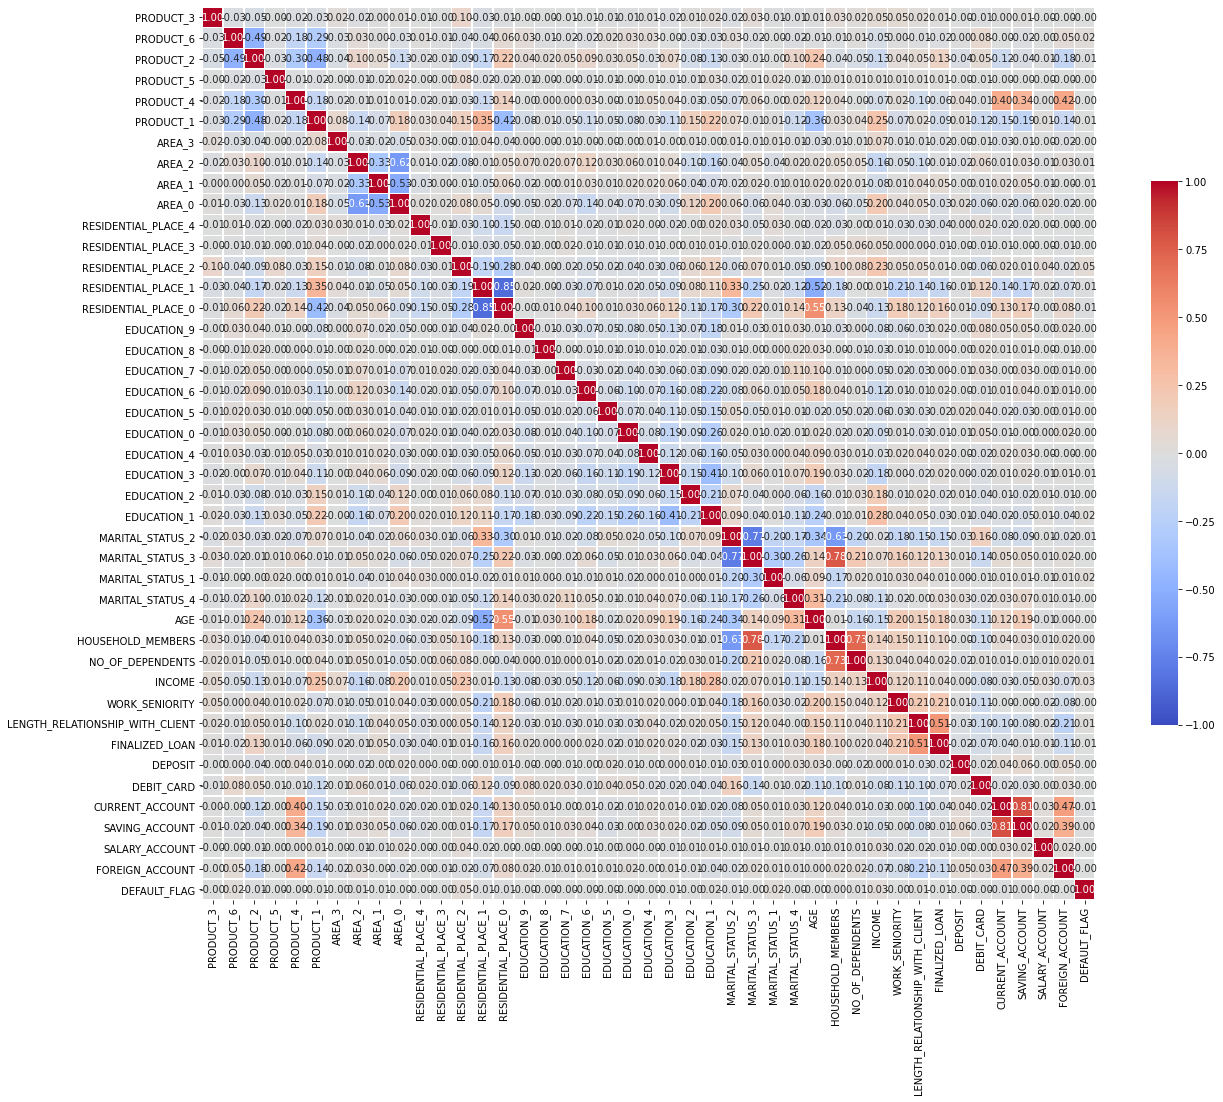

In [22]:
# Badanie korelacji
correlation_matrix = selected_features_encoded_df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, vmin=-1, vmax=1)
plt.show()

Tworzenie nowych cech: Możemy utworzyć nowe cechy na podstawie już istniejących, np. stosunek długości związku z klientem do długości pracy, czy wskaźnik zadłużenia (np. stosunek przychodu do liczby członków w gospodarstwie domowym).

Przekształcenie cech numerycznych: Przekształcenie cech za pomocą funkcji matematycznych, np. zastosowanie logarytmu lub pierwiastka kwadratowego, może pomóc w poprawie ich rozkładu i zwiększeniu wydajności modelu.

Normalizacja danych: Normalizacja cech numerycznych, aby miały średnią równą 0 i wariancję równą 1, może pomóc w zwiększeniu wydajności niektórych algorytmów uczenia maszynowego.

Usunięcie obserwacji odstających: Usunięcie obserwacji, które znacząco różnią się od reszty danych, może poprawić wydajność modelu.

Wybór istotnych cech: Przeprowadzenie analizy cech za pomocą metod jak analiza głównych składowych (PCA) lub testy statystyczne, aby zidentyfikować istotne cechy dla predykcji.

In [23]:
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

In [24]:
# Tworzenie nowych cech
selected_features_encoded_df['RELATIONSHIP_WORK_RATIO'] = selected_features_encoded_df['LENGTH_RELATIONSHIP_WITH_CLIENT'] / selected_features_encoded_df['WORK_SENIORITY']
selected_features_encoded_df['DEBT_INCOME_RATIO'] = selected_features_encoded_df['INCOME'] / selected_features_encoded_df['HOUSEHOLD_MEMBERS']

In [25]:
# Przekształcenie cech numerycznych
selected_features_encoded_df['LOG_INCOME'] = np.log1p(selected_features_encoded_df['INCOME'])
selected_features_encoded_df['SQRT_AGE'] = np.sqrt(selected_features_encoded_df['AGE'])

In [26]:
# Normalizacja danych
scaler = RobustScaler()
selected_features_encoded_df[['INCOME', 'AGE', 'HOUSEHOLD_MEMBERS', 'NO_OF_DEPENDENTS']] = scaler.fit_transform(selected_features_encoded_df[['INCOME', 'AGE', 'HOUSEHOLD_MEMBERS', 'NO_OF_DEPENDENTS']])

In [27]:
# Usunięcie obserwacji odstających
selected_features_encoded_df = selected_features_encoded_df[selected_features_encoded_df['INCOME'] < 10]

In [28]:
# Wybór istotnych cech
pca = PCA(n_components=10)
selected_features_pca = pca.fit_transform(selected_features_encoded_df.drop(columns=['DEFAULT_FLAG']))

In [29]:
# Aktualizacja nazw cech po zastosowaniu PCA
pca_feature_names = [f'PCA_{i}' for i in range(selected_features_pca.shape[1])]
selected_features_pca_df = pd.DataFrame(selected_features_pca, columns=pca_feature_names)

In [30]:
# Połączenie zbiórów danych po zastosowaniu PCA
selected_features_encoded_df = pd.concat([selected_features_encoded_df.reset_index(drop=True), selected_features_pca_df.reset_index(drop=True)], axis=1)

In [31]:
# Aktualizacja listy nazw cech
all_feature_names = list(selected_features_encoded_df.columns)

In [32]:
# Podział na zbiór treningowy i testowy
X = selected_features_encoded_df.drop(columns=['DEFAULT_FLAG'])
y = selected_features_encoded_df['DEFAULT_FLAG']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Wybrane cechy dla wizualizacji
selected_features_visualization = ['AGE', 'INCOME', 'HOUSEHOLD_MEMBERS', 'LENGTH_RELATIONSHIP_WITH_CLIENT', 'FINALIZED_LOAN']

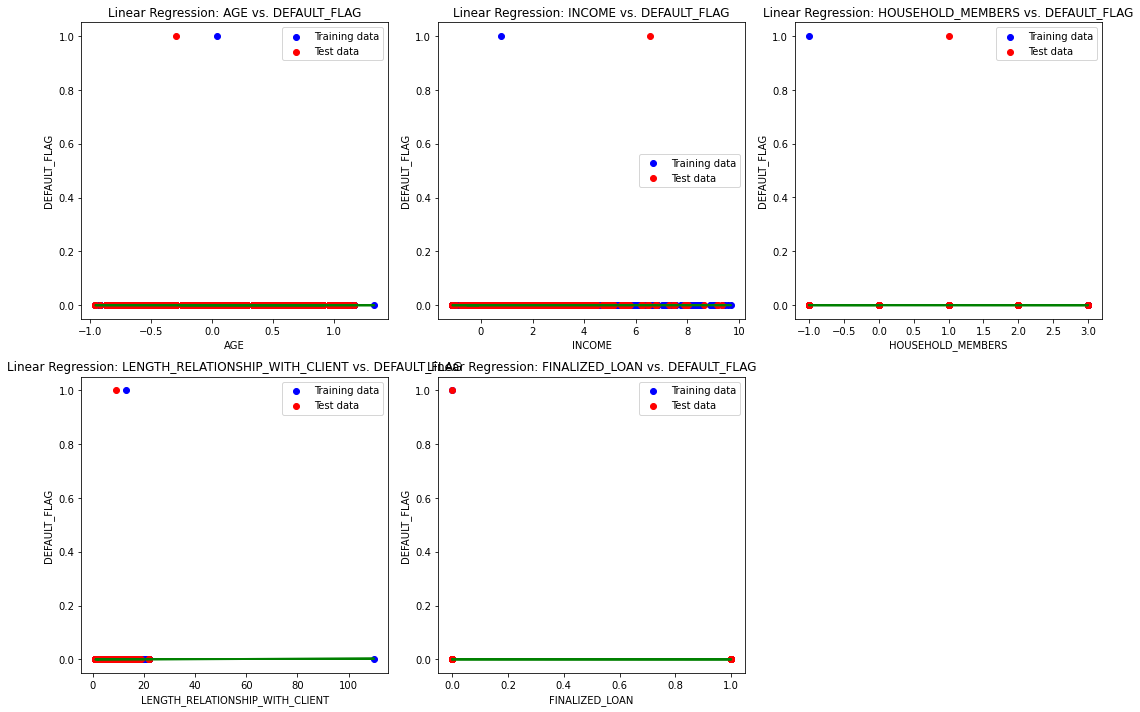

In [34]:
# Tworzenie wykresów regresji liniowej
plt.figure(figsize=(15, 10))
for i, feature in enumerate(selected_features_visualization, 1):
    plt.subplot(2, 3, i)
    plt.scatter(X_train[feature], y_train, color='blue', label='Training data')
    plt.scatter(X_test[feature], y_test, color='red', label='Test data')
    model = LinearRegression()
    model.fit(X_train[[feature]], y_train)
    x_values = X_train[feature].append(X_test[feature])
    plt.plot(x_values, model.predict(x_values.values.reshape(-1, 1)), color='green', linewidth=2)
    plt.title(f'Linear Regression: {feature} vs. DEFAULT_FLAG')
    plt.xlabel(feature)
    plt.ylabel('DEFAULT_FLAG')
    plt.legend()

plt.tight_layout()
plt.show()

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Definicja cech numerycznych i kategorycznych
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Pipeline zawierający przetwarzanie i klasyfikator
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', SelectKBest(score_func=f_classif, k=10)),  # Wybór 10 najlepszych cech
    ('pca', PCA(n_components=5)),  # Redukcja wymiarowości do 5 komponentów PCA
    ('classifier', RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42))  # Klasyfikator RandomForest z ograniczeniem głębokości drzew
])

# Dopasowanie modelu
pipeline.fit(X_train, y_train)

# Ocena modelu
train_accuracy = accuracy_score(y_train, pipeline.predict(X_train))
test_accuracy = accuracy_score(y_test, pipeline.predict(X_test))
print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")



# NIE DZIAŁA

Train Accuracy: 1.00
Test Accuracy: 1.00


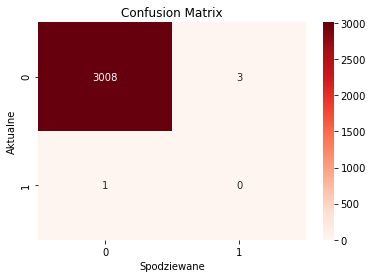

In [41]:
#confusion matrix
from sklearn.metrics import confusion_matrix
log_reg = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight='balanced', random_state=None, solver='liblinear', max_iter=100, multi_class='ovr', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
confusion_matrix(y_test, y_pred)

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Reds', fmt='g')
plt.xlabel('Spodziewane')
plt.ylabel('Aktualne')
plt.title('Confusion Matrix')
plt.show()